# Expected lottery winners for a given probability and number of tickets

Using binomial or poisson distributions, and the n choose r factorial equations, mean that estimates can be generated for the expected number of lottery winners for a given number of tickets from calculated odds of winning (matching numbers) to a range of scenairos.

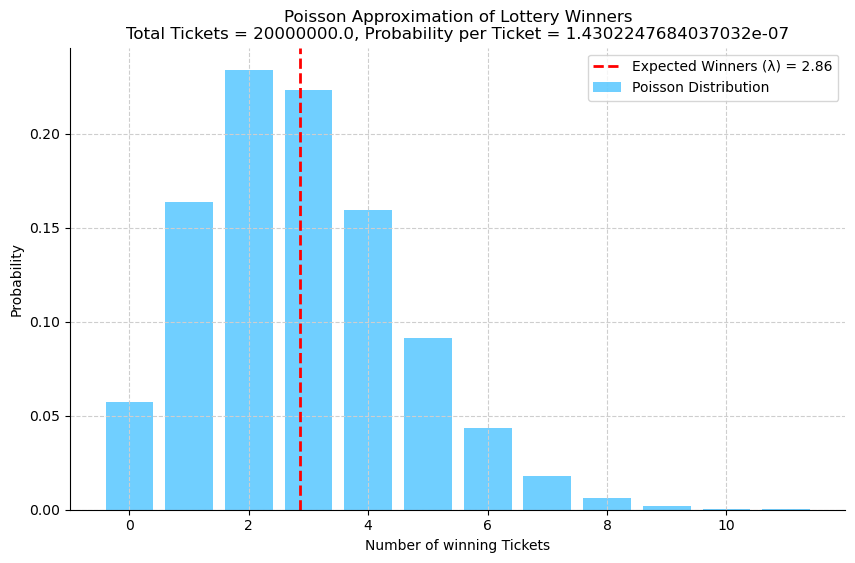

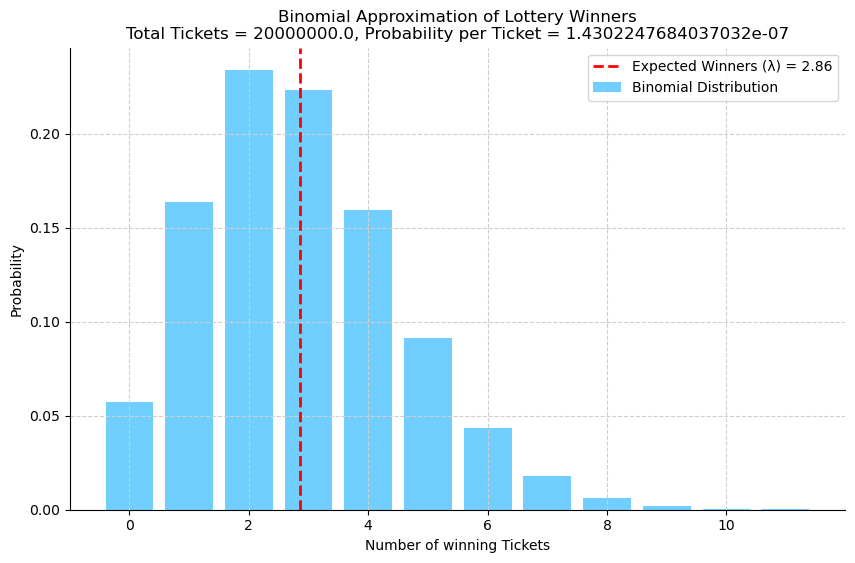

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import binom
from scipy.stats import poisson


def all_numbers_prob_simple(m,k,n,b,bb,nb):

    # P(m of k from n) = math.comb(n,k)/(math.comb(k,m) * math.comb(n-k,k-m))
   
    P = math.comb(n,k)/(math.comb(k,m) * math.comb(n-k,k-m))
    Pb = math.comb(nb,bb)/(math.comb(bb,b) * math.comb(nb-bb,bb-b))
   
    val = P*Pb

    return val

# match 5 of 5 balls with a range of 50 possible numbers, match 1 of 2 bonus balls with a range of 12 numbers
tst_euro = all_numbers_prob_simple(5,5,50,1,2,12) # match 2 bonus balls



def graph_probability_winners(total_tickets, probability_per_ticket, ranger):
    # Poisson parameter (lambda) - the expected number of winners
    lambda_poisson = total_tickets * probability_per_ticket
   
    # Range of possible winners (around the expected number)
    x = np.arange(0, int(lambda_poisson) + 10, 1)
   
    # binom pmf
    pmf_b = binom.pmf(x, total_tickets, probability_per_ticket)
   
    # Probability mass function for the Poisson distribution
    pmf = poisson.pmf(x, lambda_poisson)
   
    # Plotting the Poisson distribution
    fig,ax = plt.subplots(figsize=(10,6))
    #plt.figure(figsize=(10, 6))
    ax.bar(x, pmf, color='#33BBFF', alpha=0.7, label='Poisson Distribution')
    ax.axvline(lambda_poisson, color='r', linestyle='dashed', linewidth=2, label=f'Expected Winners (λ) = {lambda_poisson:.2f}')
    ax.set_title(f'Poisson Approximation of Lottery Winners\nTotal Tickets = {total_tickets}, Probability per Ticket = {probability_per_ticket}')
    ax.set_xlabel('Number of winning Tickets')
    ax.set_ylabel('Probability')
    ax.grid(linestyle='--',color='#CECECE')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend()
    #ax.grid(True)
    plt.show()
    
    # Plotting the Binomial distribution
    fig,ax = plt.subplots(figsize=(10,6))
    #plt.figure(figsize=(10, 6))
    ax.bar(x, pmf_b, color='#33BBFF', alpha=0.7, label='Binomial Distribution')
    ax.axvline(lambda_poisson, color='r', linestyle='dashed', linewidth=2, label=f'Expected Winners (λ) = {lambda_poisson:.2f}')
    ax.set_title(f'Binomial Approximation of Lottery Winners\nTotal Tickets = {total_tickets}, Probability per Ticket = {probability_per_ticket}')
    ax.set_xlabel('Number of winning Tickets')
    ax.set_ylabel('Probability')
    ax.grid(linestyle='--',color='#CECECE')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend()
    #ax.grid(True)
    plt.show()

# for 20 million tickets sold, how many winners can be expected for this winning number combination (probability of winning)
graph_probability_winners(20e6,1/tst_euro,15)